# CodersCave Batch-1 Phase-2

## Normal Task-Diabetes Prediction

In [52]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.style as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [53]:
import warnings
warnings.filterwarnings('ignore')

### loading the dataset

In [54]:
df=pd.read_csv('diabetes.csv')

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Display the first 10 rows of the dataset using head method

In [56]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Display the last 10 rows of the dataset using tail method

In [57]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Display the columns of the dataset

In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### display the shape of the dataset using shape attribute

In [59]:
df.shape

(768, 9)

In [60]:
print("No.of Rows:",df.shape[0])
print("No.of Columns:",df.shape[1])

No.of Rows: 768
No.of Columns: 9


### Display the information of the dataset using info method

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Display the statistics of the dataset using describe method

In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### display the count of persons having diabetes positive and negative

In [64]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

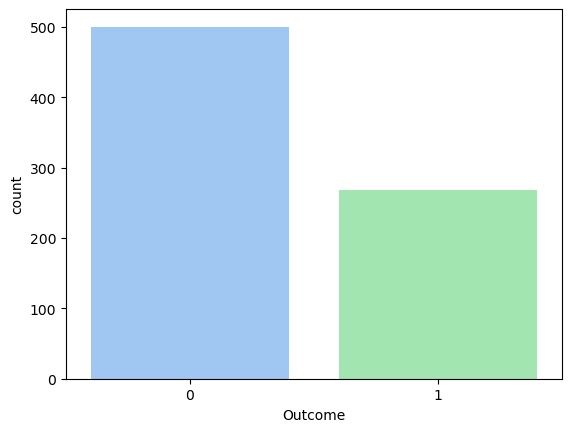

In [65]:
sea.countplot(x="Outcome",data=df)
plt.show()

In [66]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Check whether there are any null values in the dataset

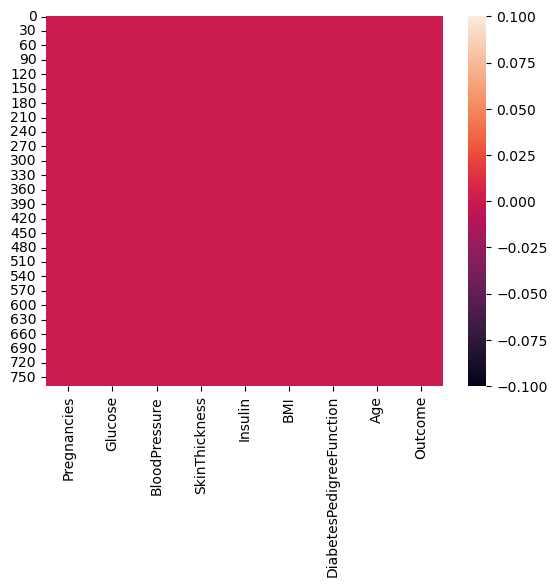

In [67]:
import seaborn as sea
sea.heatmap(df.isnull())
plt.show()

In [68]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Display the barplot between age and diabetes outcome

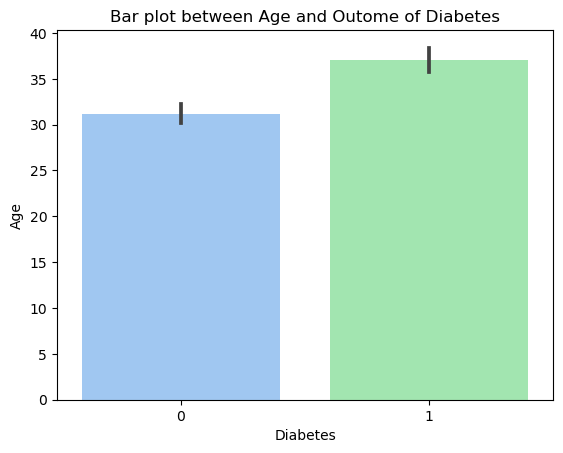

In [69]:
import matplotlib.pyplot as plt
sea.barplot(x="Outcome",y="Age", data=df)
plt.xlabel("Diabetes")
plt.title("Bar plot between Age and Outome of Diabetes")
plt.show()

### Display a barplot between BMI and diabetes Outcome

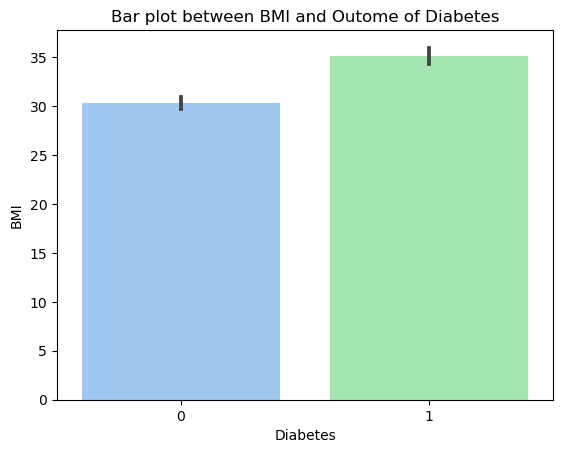

In [70]:
sea.barplot(x="Outcome",y="BMI",data=df)
plt.xlabel("Diabetes")
plt.title("Bar plot between BMI and Outome of Diabetes")
plt.show()

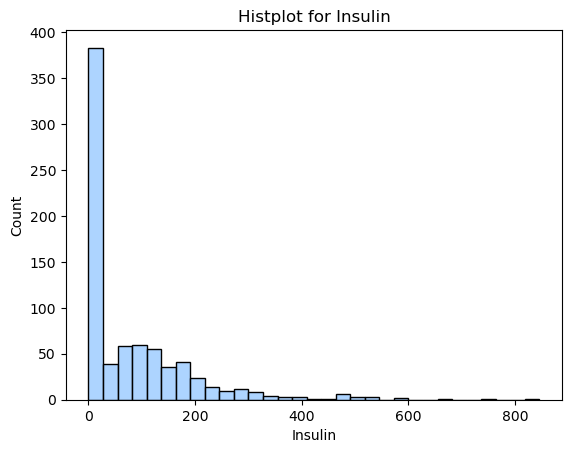

In [71]:
sea.histplot(x="Insulin",data=df)
plt.title("Histplot for Insulin")
plt.show()

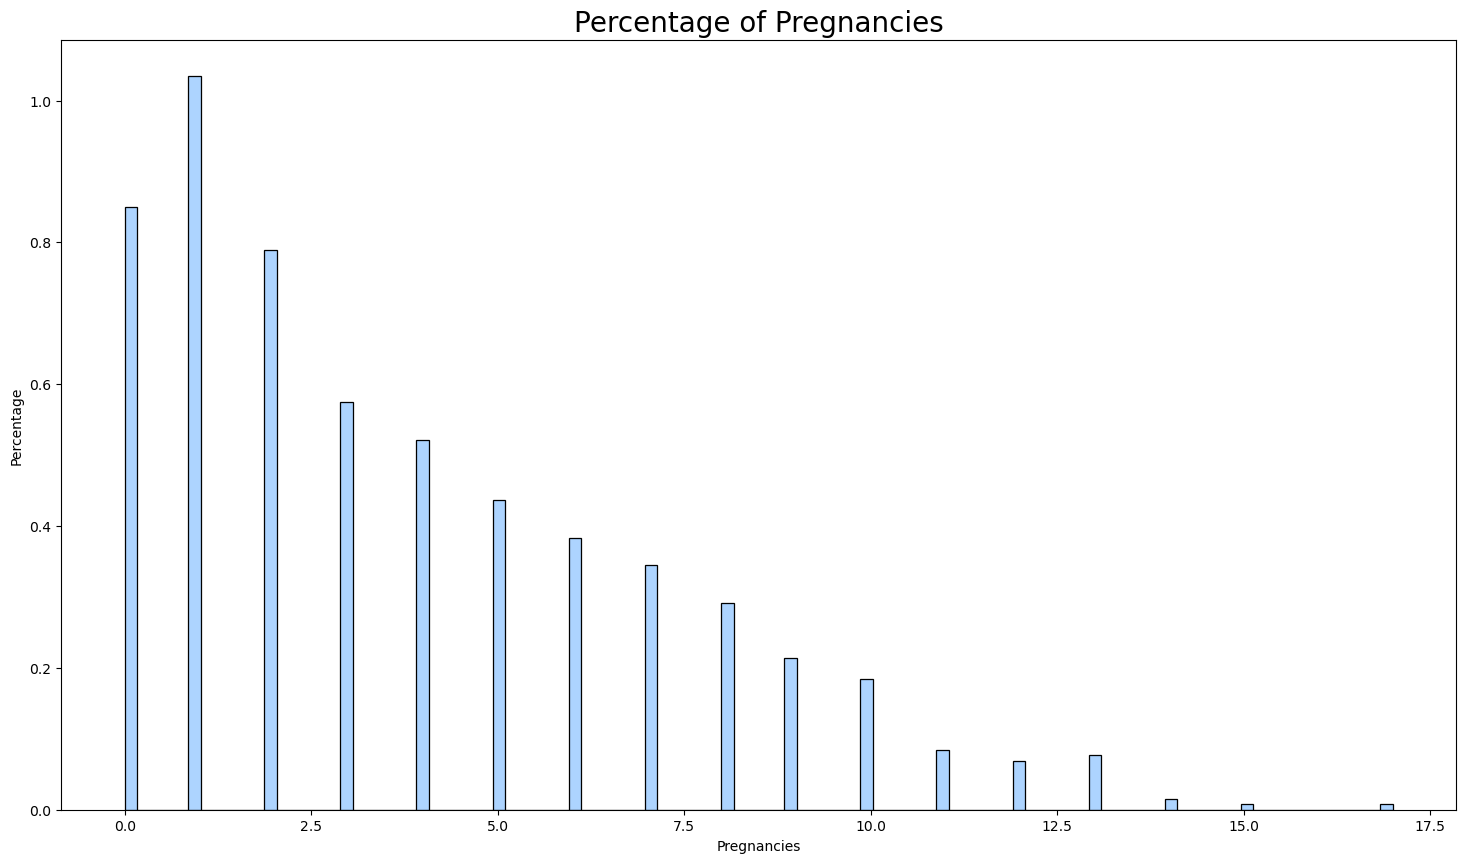

In [72]:
plt.figure(figsize=(18,10))
sea.histplot(df['Pregnancies'],bins=100,stat='density')
plt.ylabel("Percentage")
plt.title("Percentage of Pregnancies",size=20)
plt.show()

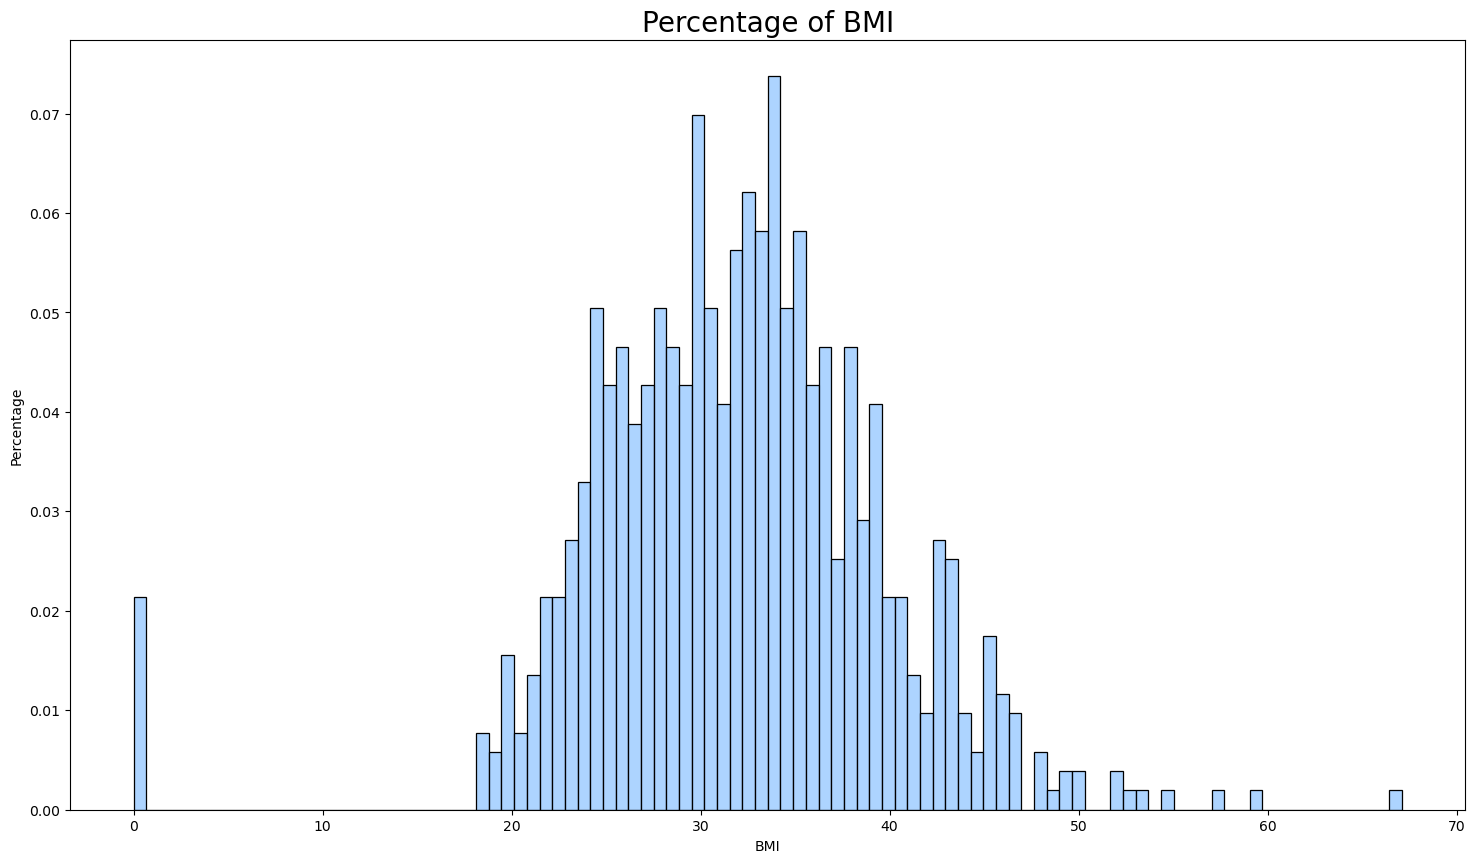

In [73]:
plt.figure(figsize=(18,10))
sea.histplot(df['BMI'],bins=100,stat='density')
plt.ylabel("Percentage")
plt.title("Percentage of BMI",size=20)
plt.show()

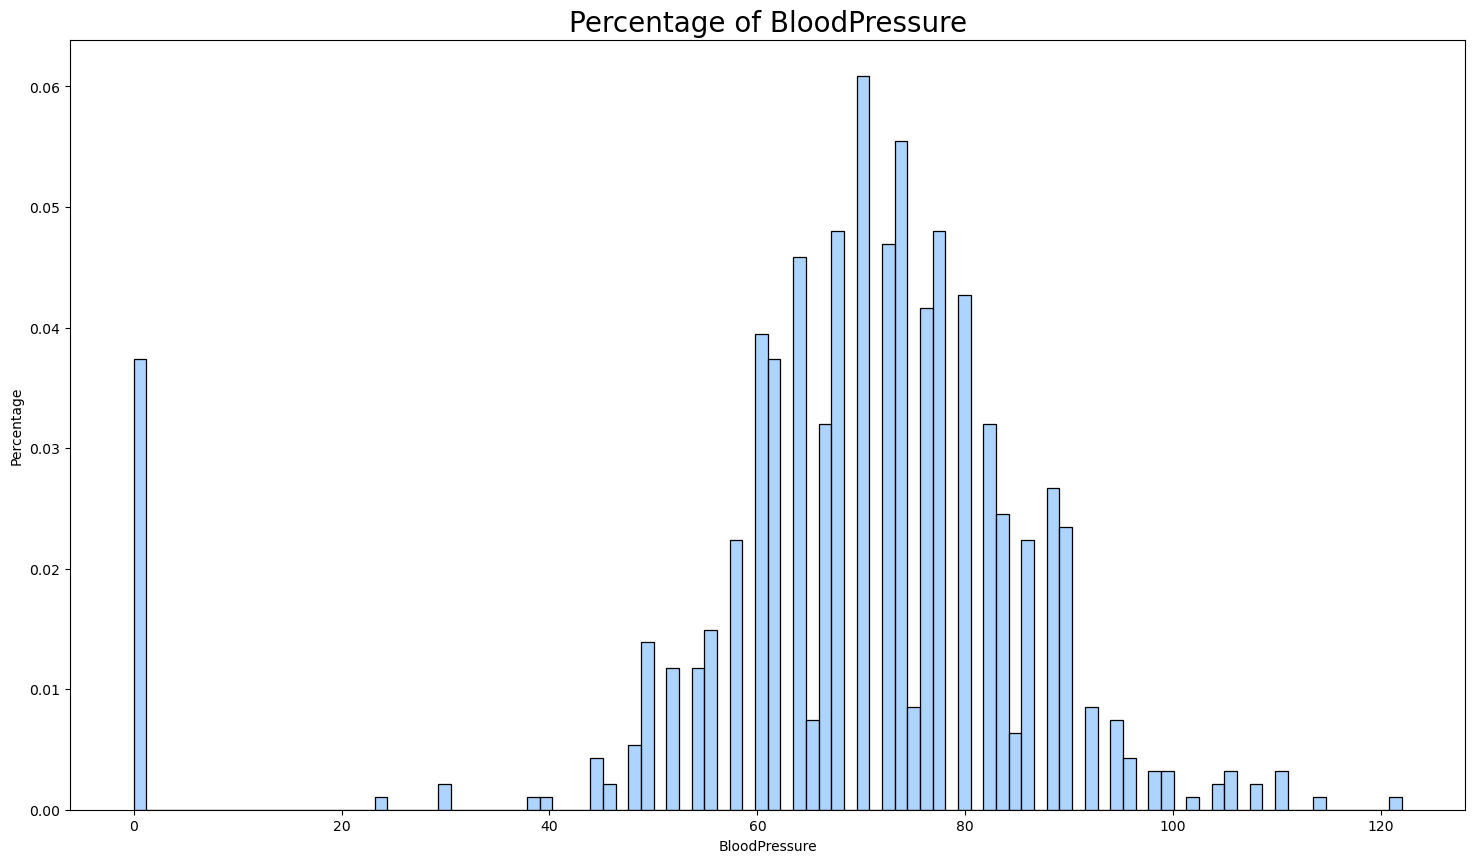

In [74]:
plt.figure(figsize=(18,10))
sea.histplot(df['BloodPressure'],bins=100,stat='density')
plt.ylabel("Percentage")
plt.title("Percentage of BloodPressure",size=20)
plt.show()

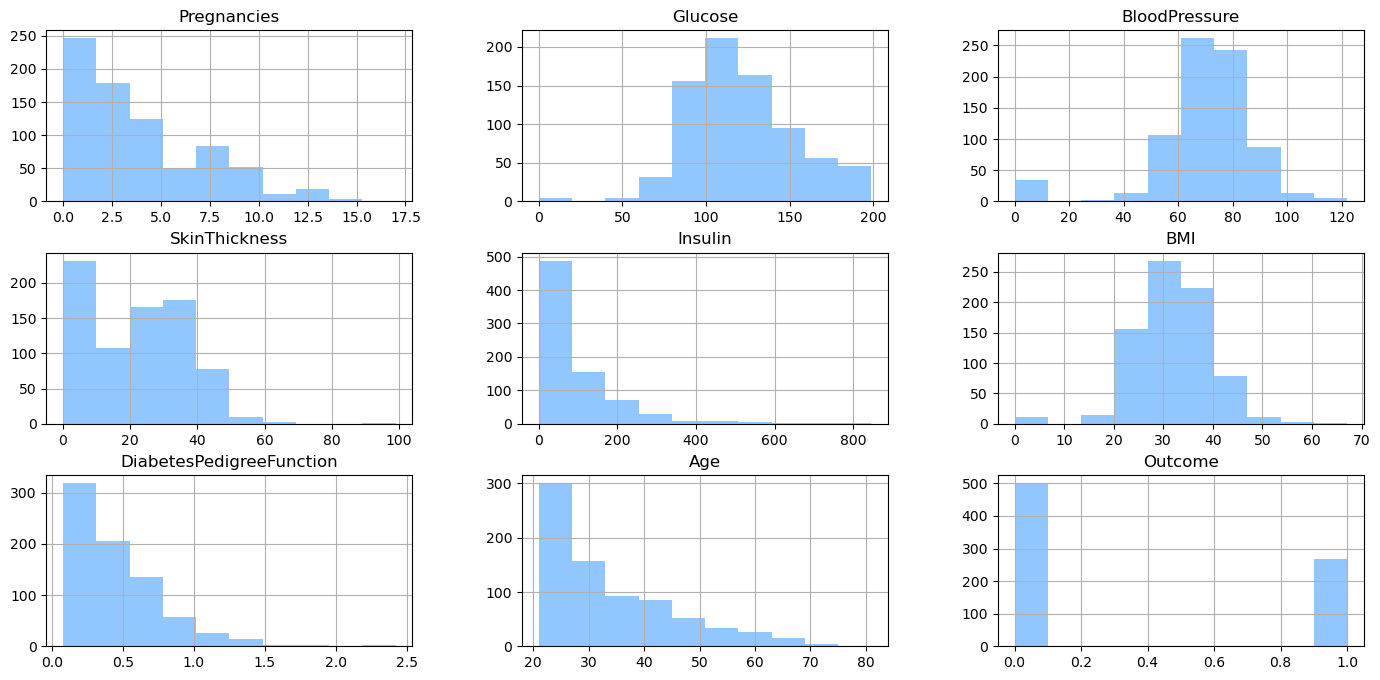

In [75]:
df.hist(figsize=(17,8))
plt.show()

In [76]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Display a piechart for diabetes outcome

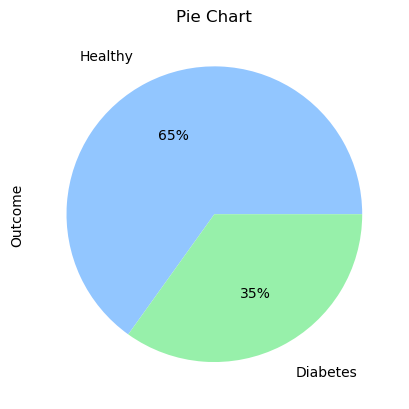

In [77]:
st.available
st.use('seaborn-pastel')
labels=['Healthy','Diabetes']
df['Outcome'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.2)
plt.title("Pie Chart")
plt.show()

### Correlation between columns

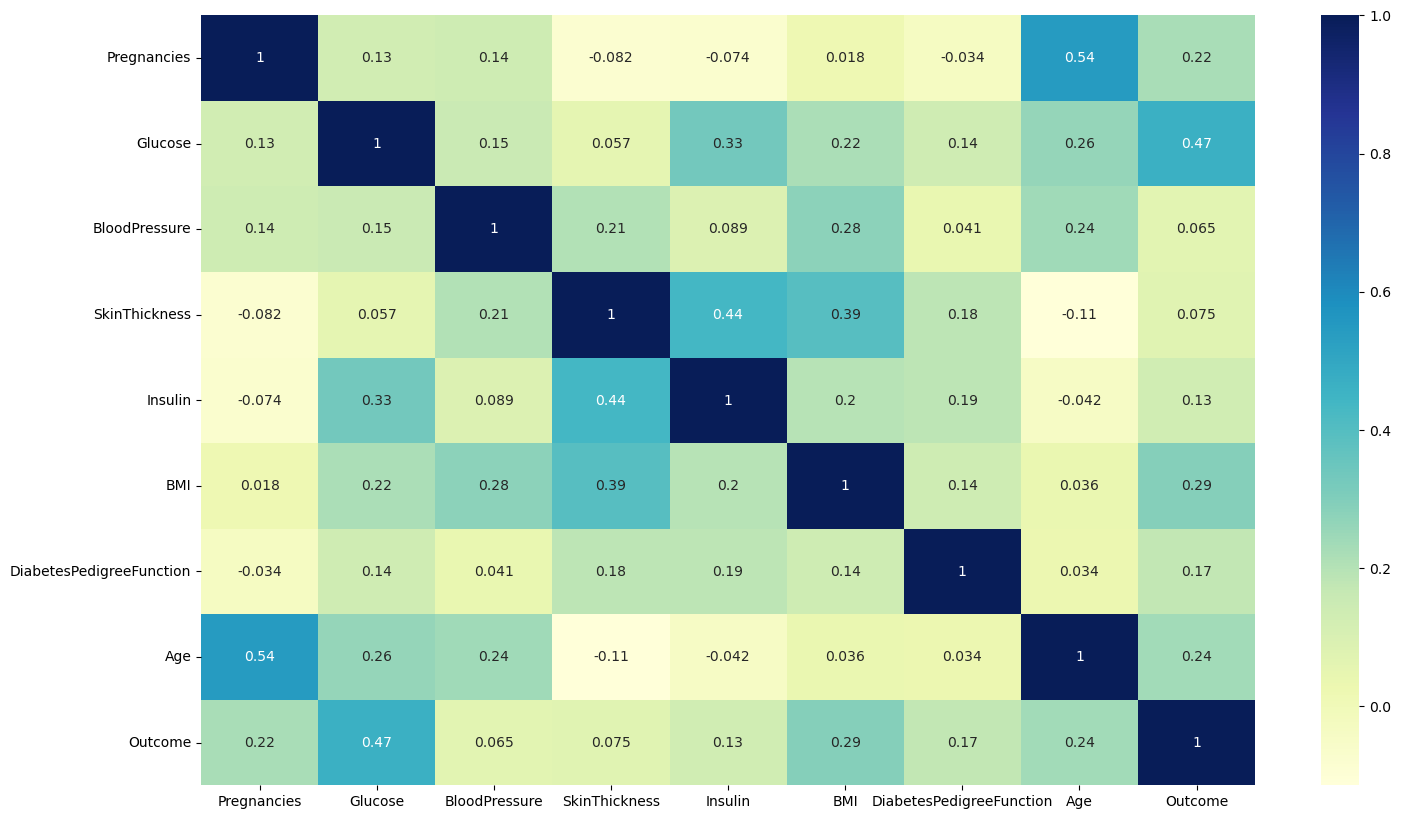

In [78]:
plt.figure(figsize=(17,10))
sea.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [79]:
a=df.drop(columns='Outcome',axis=1)
b=df['Outcome']

In [80]:
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [81]:
b

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Display a pairplot for diabetes prediction

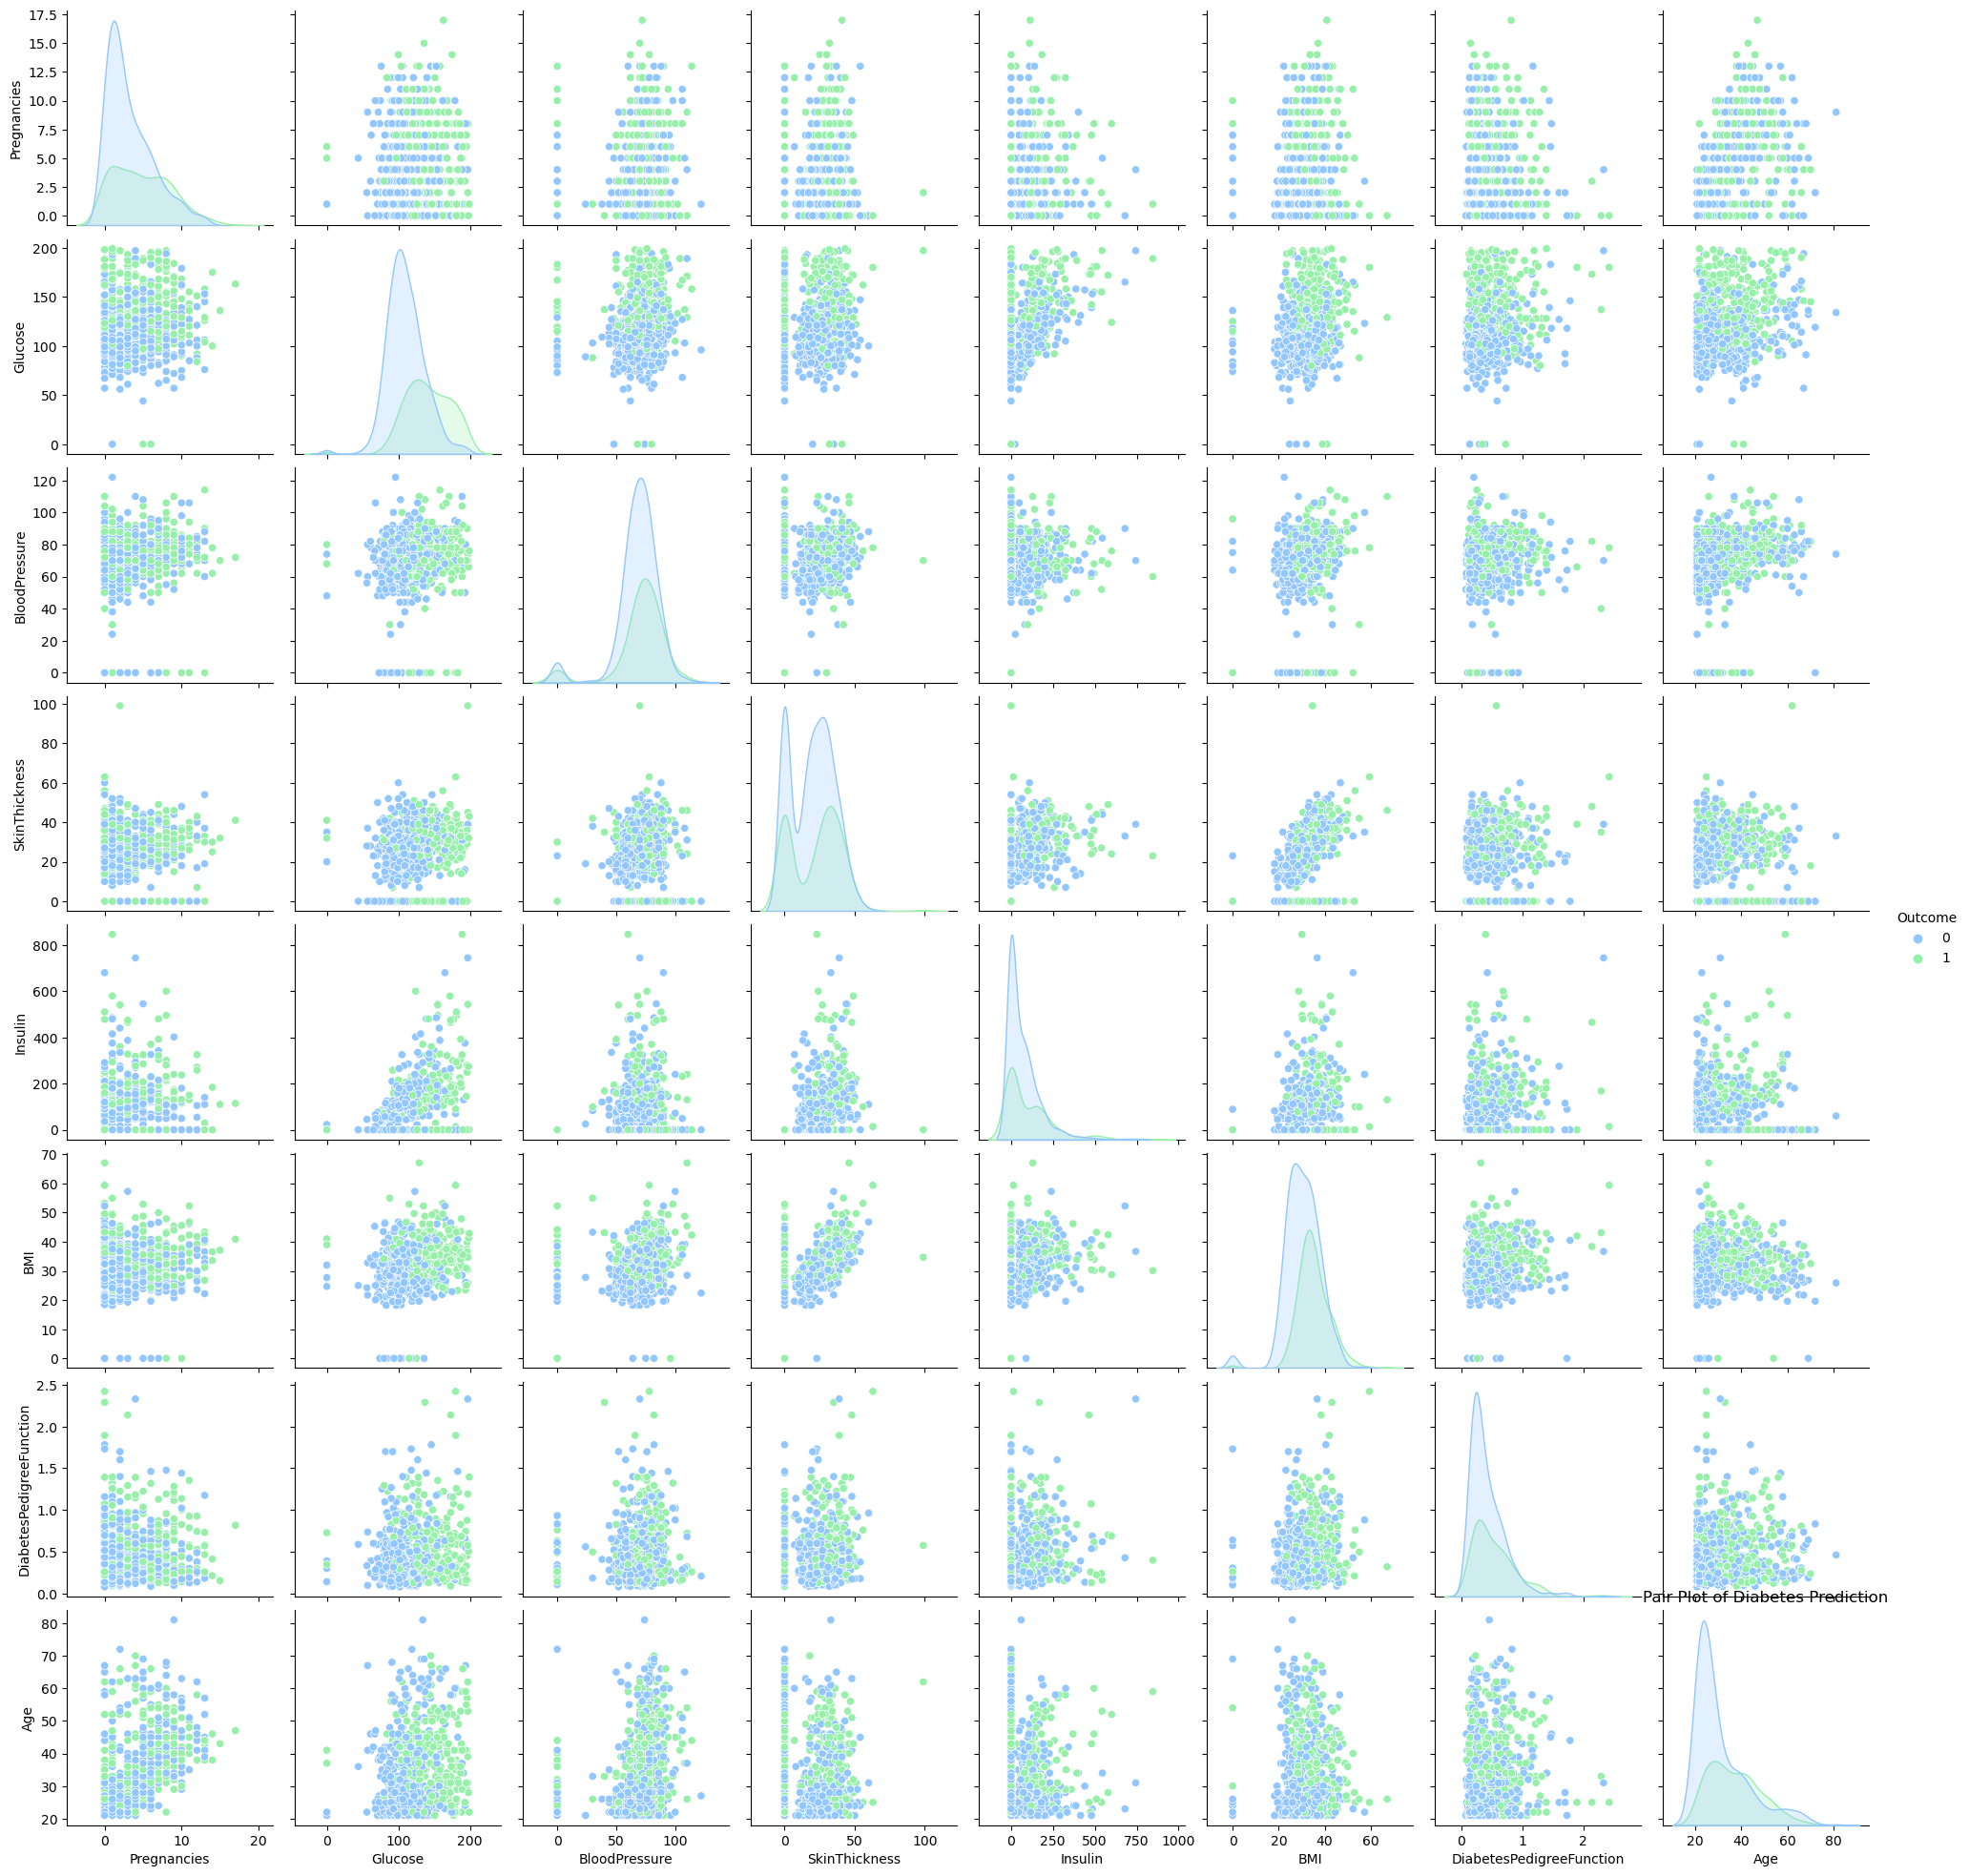

In [82]:
sea.pairplot(data=df,hue="Outcome")
plt.title("Pair Plot of Diabetes Prediction")
plt.xticks(size=20)
plt.show()

### Data Standardization

In [196]:
s=StandardScaler()

In [197]:
s.fit(a)

StandardScaler()

In [198]:
sd=s.transform(a)
print(sd)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [199]:
X=sd
Y=df['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [201]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [202]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [203]:
X_train_pred=classifier.predict(X_train)
train_accuracy=accuracy_score(X_train_pred,Y_train)
print(train_accuracy)

0.7866449511400652


In [204]:
X_test_pred=classifier.predict(X_test)
test_accuracy=accuracy_score(X_test_pred,Y_test)
print("Accuracy of the model with Linear Regression:",test_accuracy)

Accuracy of the model with Linear Regression: 0.7727272727272727


### Predictive system

In [205]:
input_data = (1,85,66,29,0,26.6,0.351,31)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = s.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]
[0]
The person is not diabetic


In [206]:
feature_col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=df[feature_col]
y=df.Outcome

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

## logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [209]:
model.fit(X_train,y_train)

LogisticRegression()

In [210]:
y_pred=model.predict(X_test)

In [211]:
print(y_pred)

[0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 1 1 0 0 0]


In [212]:
model.score(X_test,y_test)

0.7748917748917749

In [213]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with Logistic Regression:",accuracy)

Accuracy of the model with Logistic Regression: 0.7748917748917749
